In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
#merge data on the Portuguese and Math Class
mat_data = pd.read_csv("student_mat.csv")
por_data = pd.read_csv("student_por.csv")

In [265]:
mat_data.shape

(395, 33)

In [266]:
por_data.shape

(649, 33)

In [267]:
#merge data on a set of condition to find overlapping students between math and portuguese datasets

student_data = pd.merge(por_data, mat_data, how="outer", on =["school", "sex", "age", "address", "famsize",\
                                                             "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",\
                                                             "reason", "nursery"])

In [268]:
student_data.shape

(686, 54)

In [269]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
4,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0


In [270]:
por = pd.read_csv("student_por.csv")

In [271]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [272]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [273]:
#to be able to compute correlation from 32 dimensions, we are transforming categorical variables into numerical
#transformation 1: binary yes/no to 1/0
por.loc[:, "schoolsup":"romantic"].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,no,no,yes,yes,yes,no
3,no,yes,no,yes,yes,yes,yes,yes
4,no,yes,no,no,yes,yes,no,no


In [274]:
por = por.replace({"yes":1, "no":0})

In [275]:
por.loc[:, "schoolsup":"romantic"].head(3)

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0


In [276]:
#transformation 2: sex, F=0, M=1
por["gender"]=por["sex"].apply(lambda x: 0 if x=="F" else 1)

In [277]:
por["sex"].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [278]:
por["gender"].value_counts()

0    383
1    266
Name: gender, dtype: int64

In [279]:
#transformation 3: family size, LE3 - less then 3=0, GT3 - greater than 3=1
por["famsize"].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [280]:
por["familysize"] = por["famsize"].apply(lambda x:0 if x=="LE3" else 1)

In [281]:
#transformation 4: parent status, A-apart = 0, T-together =1
por["Pstatus"].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

In [282]:
por["parentstatus"] = por["Pstatus"].apply(lambda x:0 if x=="A" else 1)

In [283]:
#transformation 5: address, R-rural= 0, U-urban = 1
por["newaddress"] = por["address"].apply(lambda x:0 if x=="R" else 1)

In [284]:
#transformation 6: guardian
por["guardian"].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

In [285]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [286]:
label = le.fit_transform(por['guardian'])

In [287]:
label

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,

In [288]:
por["student_guardian"] = label

In [289]:
por["student_guardian"].value_counts() #father = 0, mother = 1, other = 2

1    455
0    153
2     41
Name: student_guardian, dtype: int64

In [290]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school            649 non-null    object
 1   sex               649 non-null    object
 2   age               649 non-null    int64 
 3   address           649 non-null    object
 4   famsize           649 non-null    object
 5   Pstatus           649 non-null    object
 6   Medu              649 non-null    int64 
 7   Fedu              649 non-null    int64 
 8   Mjob              649 non-null    object
 9   Fjob              649 non-null    object
 10  reason            649 non-null    object
 11  guardian          649 non-null    object
 12  traveltime        649 non-null    int64 
 13  studytime         649 non-null    int64 
 14  failures          649 non-null    int64 
 15  schoolsup         649 non-null    int64 
 16  famsup            649 non-null    int64 
 17  paid            

In [291]:
por = por.drop(["sex", "famsize", "address", "Pstatus", "guardian"], axis=1)

In [292]:
#linear regression model 2: predicting weekday alcohol consumption - Dalc
new_corr2 = por.corr()
new_corr2["Dalc"].sort_values(ascending=False)

Dalc                1.000000
Walc                0.616561
gender              0.282696
goout               0.245126
absences            0.172952
age                 0.134768
freetime            0.109904
failures            0.105949
traveltime          0.092824
romantic            0.062042
health              0.059067
paid                0.051986
internet            0.042811
parentstatus        0.041513
student_guardian    0.023330
activities          0.022592
Fedu                0.000061
Medu               -0.007018
famsup             -0.016844
schoolsup          -0.028076
newaddress         -0.047304
familysize         -0.060482
famrel             -0.075767
nursery            -0.078376
higher             -0.131663
studytime          -0.137585
G2                 -0.189480
G1                 -0.195171
G3                 -0.204719
Name: Dalc, dtype: float64

In [293]:
#linear regression model 2: predicting weekday alcohol consumption - Dalc
#drop variables where the correlation is less than +-0.06
por = por.drop(["health", "paid", "internet", "parentstatus", "student_guardian", "activities", "Fedu",\
               "Medu", "famsup", "schoolsup", "newaddress"], axis=1)

In [294]:
por.head()

,school,age,Mjob,Fjob,reason,traveltime,studytime,failures,nursery,higher,...,freetime,goout,Dalc,Walc,absences,G1,G2,G3,gender,familysize
0,GP,18,at_home,teacher,course,2,2,0,1,1,...,3,4,1,1,4,0,11,11,0,1
1,GP,17,at_home,other,course,1,2,0,0,1,...,3,3,1,1,2,9,11,11,0,1
2,GP,15,at_home,other,other,1,2,0,1,1,...,3,2,2,3,6,12,13,12,0,0
3,GP,15,health,services,home,1,3,0,1,1,...,2,2,1,1,0,14,14,14,0,1
4,GP,16,other,other,home,1,2,0,1,1,...,3,2,1,2,0,11,13,13,0,1


In [295]:
#model based off G3 final grade, dropping G1 and G2
por = por.drop(["G1", "G2"], axis=1)

In [296]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   age         649 non-null    int64 
 2   Mjob        649 non-null    object
 3   Fjob        649 non-null    object
 4   reason      649 non-null    object
 5   traveltime  649 non-null    int64 
 6   studytime   649 non-null    int64 
 7   failures    649 non-null    int64 
 8   nursery     649 non-null    int64 
 9   higher      649 non-null    int64 
 10  romantic    649 non-null    int64 
 11  famrel      649 non-null    int64 
 12  freetime    649 non-null    int64 
 13  goout       649 non-null    int64 
 14  Dalc        649 non-null    int64 
 15  Walc        649 non-null    int64 
 16  absences    649 non-null    int64 
 17  G3          649 non-null    int64 
 18  gender      649 non-null    int64 
 19  familysize  649 non-null    int64 
dtypes: int64(1

In [297]:
#transform Mjob from categorical to numerical
label1 = le.fit_transform(por['Mjob'])

In [298]:
por["motherjob"] = label1

In [299]:
por["motherjob"].value_counts() #0 at home, 1 health, 2 other, 3 services, 4 teacher

2    258
3    136
0    135
4     72
1     48
Name: motherjob, dtype: int64

In [300]:
por["Mjob"].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [301]:
label2 = le.fit_transform(por['Fjob'])

In [302]:
por["fatherjob"] = label2

In [303]:
por["fatherjob"].value_counts() #0 at home, 1 health, 2 other, 3 services, 4 teacher

2    367
3    181
0     42
4     36
1     23
Name: fatherjob, dtype: int64

In [304]:
por["Fjob"].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [305]:
label3 = le.fit_transform(por['reason'])

In [306]:
por["schoolchoosing_reason"] = label3

In [307]:
por["schoolchoosing_reason"].value_counts() #0 course, 1 home, 2 other, 3 reputation

0    285
1    149
3    143
2     72
Name: schoolchoosing_reason, dtype: int64

In [308]:
por["reason"].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

In [309]:
new_corr3 = por.corr()
new_corr3["Dalc"].sort_values(ascending=False)

Dalc                     1.000000
Walc                     0.616561
gender                   0.282696
goout                    0.245126
absences                 0.172952
age                      0.134768
freetime                 0.109904
failures                 0.105949
traveltime               0.092824
romantic                 0.062042
fatherjob                0.055389
motherjob                0.049576
schoolchoosing_reason   -0.010735
familysize              -0.060482
famrel                  -0.075767
nursery                 -0.078376
higher                  -0.131663
studytime               -0.137585
G3                      -0.204719
Name: Dalc, dtype: float64

In [310]:
#because our dataframe still consists of 22 columns which makes it challenging to visualize the correlation on
#an sns heatmap, we would want to further drop correlation pairs which are less than +-0.10
por = por.drop(["traveltime", "fatherjob", "motherjob", "schoolchoosing_reason", "familysize", "nursery",\
               "Mjob", "Fjob", "reason"], axis=1)

In [311]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     649 non-null    object
 1   age        649 non-null    int64 
 2   studytime  649 non-null    int64 
 3   failures   649 non-null    int64 
 4   higher     649 non-null    int64 
 5   romantic   649 non-null    int64 
 6   famrel     649 non-null    int64 
 7   freetime   649 non-null    int64 
 8   goout      649 non-null    int64 
 9   Dalc       649 non-null    int64 
 10  Walc       649 non-null    int64 
 11  absences   649 non-null    int64 
 12  G3         649 non-null    int64 
 13  gender     649 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 71.1+ KB


<AxesSubplot:>

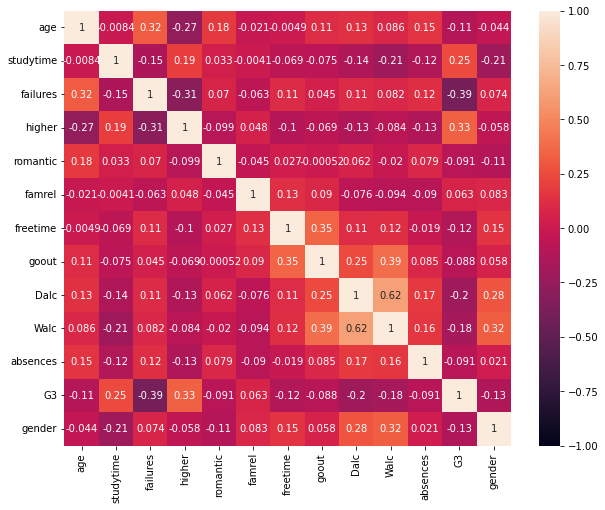

In [312]:
plt.figure(figsize=(10,8))
sns.heatmap(por.corr(), vmin=-1,vmax=1, annot=True)

<AxesSubplot:>

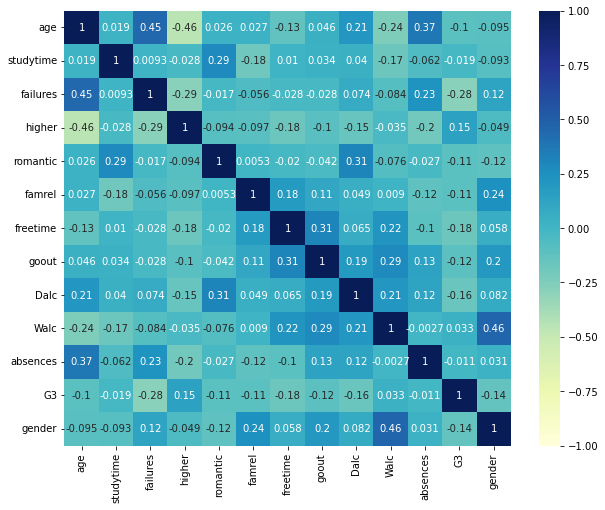

In [313]:
#plotting a heatmap to explore what factors contribute to a medium to high weekday alcohol consumption
#3 <= Dalc <= 5
plt.figure(figsize=(10,8))
sns.heatmap(por[por["Dalc"]>=3].corr(),vmin=-1,vmax=1, annot=True, cmap="YlGnBu")

In [314]:
#from the heatmap, we can conclude that students who consumed moderate to high level of alcohol during the
#weekday tend to involve in romantic relationship, older age wise, go out frequently
#in contrast, their G3 final grades seem to be lower as the amount of weekday alcohol consumption increases,
#and they show less interest in pursing higher education

In [315]:
por["school"].value_counts()

GP    423
MS    226
Name: school, dtype: int64

<AxesSubplot:xlabel='G3', ylabel='Dalc'>

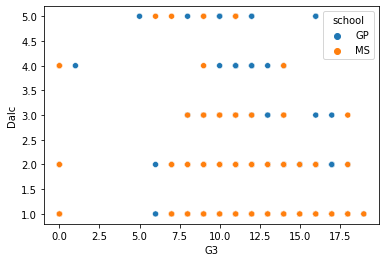

In [316]:
sns.scatterplot(x=por["G3"], y=por["Dalc"], hue=por["school"])

<AxesSubplot:xlabel='age', ylabel='failures'>

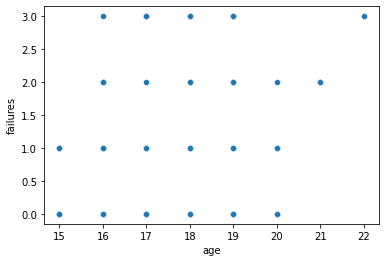

In [317]:
sns.scatterplot(x=por["age"], y=por["failures"], data=por)

In [318]:
#scoring higher on the final grade seems to lead students drinking less alcohol during the week.
#the heatmap shows that those consumed no alcohol Dalc = 1, are those scored closer to 20 which is the max point on the grading scale.
#the heatmap points out that as academic performance worsens, students tend to drink more alcolhol during the weekday
#the distribution of higher scores remains at the lower alcohol consumption level 1 and 2.
#school GP has heavier weekday drinking culture, compared to school MS.

In [319]:
from statsmodels.formula.api import ols

In [320]:
model = ols("Dalc ~ higher + goout + G3 + studytime", data=por).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dalc   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     18.34
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           2.79e-14
Time:                        12:34:23   Log-Likelihood:                -834.67
No. Observations:                 649   AIC:                             1679.
Df Residuals:                     644   BIC:                             1702.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7527      0.187      9.348      0.0

In [321]:
#the r-squared score is only 0.097 which means this model only represents 9.7% variability of the dataset,
#so this result is not sufficient

In [322]:
model = ols("Dalc ~ higher + goout + G3 + studytime + gender + absences + failures + freetime", data=por).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dalc   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           3.89e-23
Time:                        12:34:23   Log-Likelihood:                -806.84
No. Observations:                 649   AIC:                             1632.
Df Residuals:                     640   BIC:                             1672.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3219      0.223      5.928      0.0

In [323]:
model = ols("Dalc ~ higher + G3 + studytime + gender + goout + absences + failures + romantic + age", data=por).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dalc   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.23
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           4.10e-24
Time:                        12:34:23   Log-Likelihood:                -802.88
No. Observations:                 649   AIC:                             1626.
Df Residuals:                     639   BIC:                             1671.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1476      0.531      0.278      0.7

In [324]:
model = ols("Dalc ~ Walc + higher + G3 + studytime + gender + goout + absences + failures + romantic + age", data=por).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dalc   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     44.78
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           2.79e-67
Time:                        12:34:23   Log-Likelihood:                -697.12
No. Observations:                 649   AIC:                             1416.
Df Residuals:                     638   BIC:                             1465.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0526      0.452     -0.116      0.9

In [325]:
#this model has an r-squared of 0.40 and its the maximum r-squared we can achieve to predict weekday alcohol consumption,
#considering our dataset does not have very strong correlations between variables. 
#train test model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import sklearn

In [326]:
#assign variable for the model
y = por["Dalc"]
x = por[["Walc", "higher", "G3", "studytime", "gender", "goout", "absences", "failures", "romantic", "age"]]

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=123456)

In [328]:
x_train

,Walc,higher,G3,studytime,gender,goout,absences,failures,romantic,age
393,1,1,15,4,0,3,4,0,0,18
233,1,1,13,3,0,3,0,0,0,17
199,3,1,14,2,1,4,6,0,1,17
396,3,1,17,2,1,3,6,0,1,18
219,4,1,8,3,0,3,14,1,1,17
...,...,...,...,...,...,...,...,...,...,...
171,2,1,11,1,1,2,4,0,0,16
568,1,1,9,1,1,1,4,3,0,19
49,1,1,12,2,0,4,2,0,0,15
498,1,1,14,2,0,3,0,0,0,16


In [329]:
x_test

,Walc,higher,G3,studytime,gender,goout,absences,failures,romantic,age
168,1,1,8,2,1,4,0,0,0,15
482,3,0,9,1,0,1,0,0,1,15
207,4,1,10,1,1,2,0,0,0,16
603,1,1,0,2,0,1,0,0,1,18
614,2,1,12,2,0,3,2,0,0,17
...,...,...,...,...,...,...,...,...,...,...
110,1,1,14,1,1,3,4,0,0,15
601,1,1,10,2,0,1,4,0,1,18
224,2,1,12,4,0,3,4,0,0,19
31,1,1,15,2,1,1,2,0,0,15


In [330]:
train_model = LinearRegression().fit(x_train, y_train)

In [331]:
train_model.coef_

array([ 0.41958481, -0.03784169, -0.03533996,  0.08070535,  0.16687531,
        0.00719207,  0.01379059, -0.02820454,  0.05609992,  0.05994293])

In [332]:
train_model.intercept_

-0.2894947157581267

In [333]:
predict = train_model.predict(x_test)

In [334]:
predict

array([1.06572701, 1.69434141, 2.21865495, 1.39592388, 1.31735165,
       1.61931725, 1.89665605, 0.59101092, 1.85539082, 0.52823461,
       0.65430291, 1.70792377, 1.31359683, 1.35658232, 0.82702391,
       2.31896954, 1.18275072, 1.32109507, 1.23985052, 2.19257277,
       2.46275819, 1.05768516, 0.74571264, 1.12704516, 0.94712513,
       1.24056452, 1.40649982, 1.86632366, 1.90575733, 2.47237919,
       1.21444434, 1.10289595, 0.8511232 , 0.72517868, 1.52546342,
       0.90131109, 1.23496923, 0.88805842, 1.51595612, 2.33834742,
       1.70413178, 0.99965203, 1.73920312, 0.8659443 , 1.17914915,
       1.07767086, 1.11335907, 2.33374527, 2.40846062, 1.6297982 ,
       2.66689151, 1.41000213, 0.901414  , 2.51408561, 2.19746542,
       1.40541497, 1.89385048, 0.71779076, 0.86634266, 2.0723462 ,
       2.06427474, 0.96587948, 2.38291764, 2.01668301, 1.14171324,
       1.23812551, 2.62294822, 1.19825273, 0.92720055, 2.6894255 ,
       0.95086351, 1.84408958, 0.91833341, 1.78456606, 1.01101

In [335]:
residuals = predict - y_test

In [336]:
residuals

168    0.065727
482    0.694341
207   -0.781345
603    0.395924
614    0.317352
         ...   
110   -0.179048
601    0.097687
224    0.626229
31    -0.175648
106    0.030361
Name: Dalc, Length: 195, dtype: float64

In [337]:
#finding the average residual values with rmse
test_rmse = (np.sqrt(mean_squared_error(y_test,predict)))

In [338]:
test_rmse

0.6551004553383295

In [339]:
r2_score(y_test, predict)

0.3324054996982858

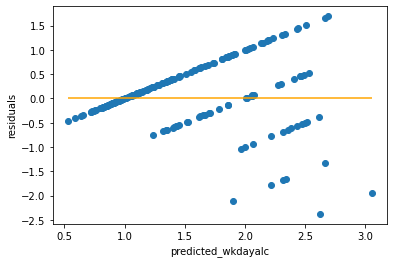

In [340]:
plt.scatter(predict, residuals)
plt.xlabel("predicted_wkdayalc")
plt.ylabel("residuals")
plt.hlines(0, min(predict), max(predict), color="orange")

In [341]:
#this model is somewhat biased because there seems to be a few more negative residuals than positive

((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

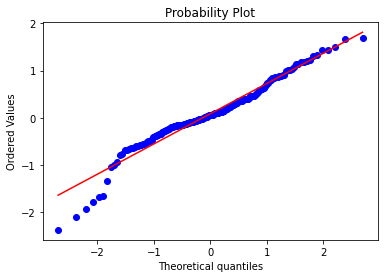

In [342]:
#plotting a qq chart
fig = plt.figure()
ax = fig.add_subplot(111)
scipy.stats.probplot(residuals, dist="norm", plot=ax)

In [343]:
#QQ plot shows that the dataset is not perfectly normal distributed, 
#most residuals are not fitted along the linear regression line. 

In [344]:
#sketching influence plot of the model
import statsmodels.api as sm

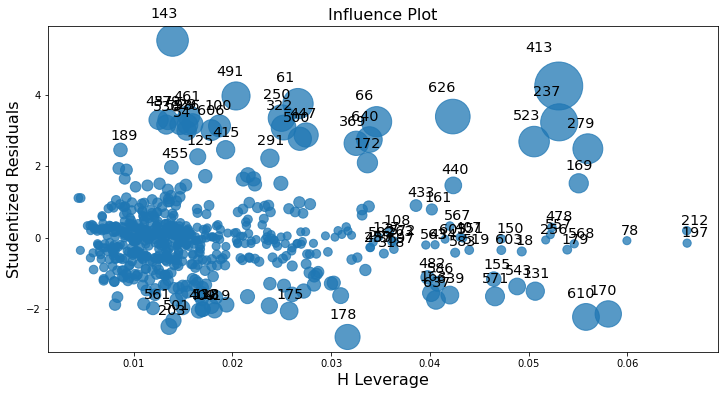

In [345]:
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")


In [346]:
#retry building linear regression model with visualizing correlation on boxplot
pordata = pd.read_csv("student_por.csv")

In [347]:
pordata = pordata.drop(["G1", "G2"], axis=1)

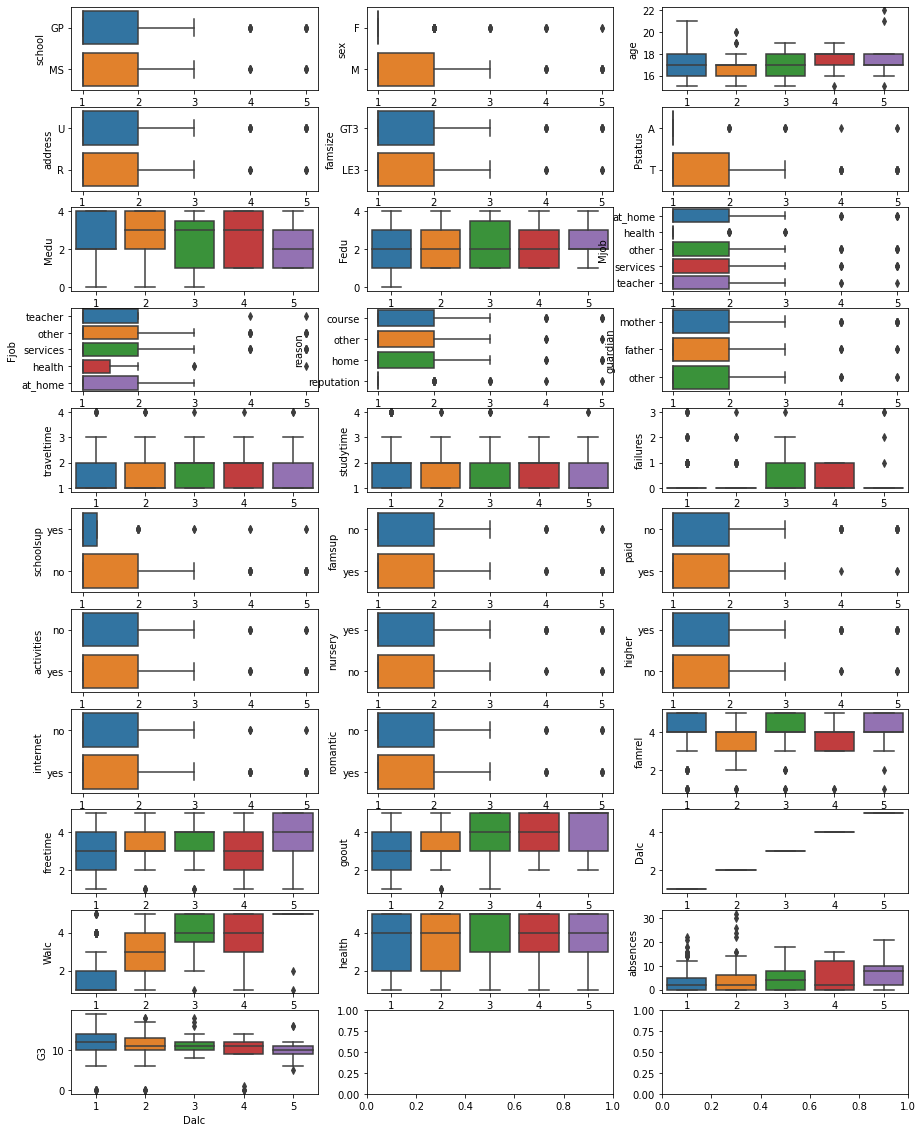

In [348]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)\
    ,(ax13,ax14,ax15), (ax16,ax17,ax18), (ax19,ax20,ax21),\
      (ax22,ax23,ax24), (ax25,ax26,ax27), (ax28,ax29,ax30),(ax31,ax32,ax33))= plt.subplots(11,3, figsize=(15,20))

# Plot all the box plots, since all the variables are continuous and we want to compare them to the target

for i in range(0,31):
    sns.boxplot(x=pordata['Dalc'], y=pordata.iloc[:,i], ax=globals()[f"ax{i+1}"])

In [349]:
modelnew = ols("Dalc ~ age + Pstatus + Medu + Mjob + failures + schoolsup + famrel + freetime + goout + health + absences + Walc +G3", data=pordata).fit()
print(modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dalc   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     27.41
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           6.24e-62
Time:                        12:34:35   Log-Likelihood:                -698.63
No. Observations:                 649   AIC:                             1431.
Df Residuals:                     632   BIC:                             1507.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2510      0.478  

In [350]:
#even without transforming categorical variable, the model does not improve much compared to the last model we tried 
#with R2 = 0.4 
#therefore just using the raw dataset, there seems to be weak correlation between variables to the weekday alc consumption. 

In [351]:
#Naive Bayes classifier, student passing score
#Assume that a student need to score higher than 12 for the final grade G3 to be considered passed. 
#We can add a column with pass outcome and build a NB classification model.
por["G3"].value_counts().sort_index()

0      15
1       1
5       1
6       3
7      10
8      35
9      35
10     97
11    104
12     72
13     82
14     63
15     49
16     36
17     29
18     15
19      2
Name: G3, dtype: int64

<AxesSubplot:xlabel='G3', ylabel='Count'>

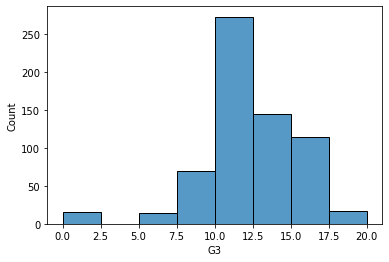

In [352]:
sns.histplot(data=por, x="G3", binwidth=2.5)

In [353]:
passed = []
for i in por["G3"]:
    if i < 12 : passed.append(0)
    else: passed.append(1)

In [354]:
por["passed"] = passed

In [355]:
por.head()

,school,age,studytime,failures,higher,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3,gender,passed
0,GP,18,2,0,1,0,4,3,4,1,1,4,11,0,0
1,GP,17,2,0,1,0,5,3,3,1,1,2,11,0,0
2,GP,15,2,0,1,0,4,3,2,2,3,6,12,0,1
3,GP,15,3,0,1,1,3,2,2,1,1,0,14,0,1
4,GP,16,2,0,1,0,4,3,2,1,2,0,13,0,1


<AxesSubplot:xlabel='passed', ylabel='Count'>

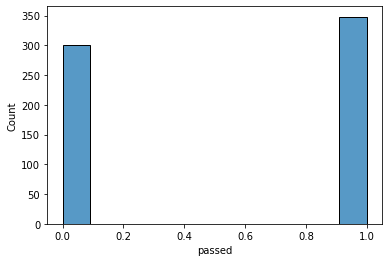

In [356]:
sns.histplot(data=por, x="passed")

In [357]:
por.groupby("passed").count()

,school,age,studytime,failures,higher,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3,gender
passed,,,,,,,,,,,,,,
0,301,301,301,301,301,301,301,301,301,301,301,301,301,301
1,348,348,348,348,348,348,348,348,348,348,348,348,348,348


In [358]:
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [359]:
train, test = train_test_split(por, test_size = 0.3, random_state = 123456)

In [360]:
train.groupby("passed").count()

,school,age,studytime,failures,higher,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3,gender
passed,,,,,,,,,,,,,,
0,207,207,207,207,207,207,207,207,207,207,207,207,207,207
1,247,247,247,247,247,247,247,247,247,247,247,247,247,247


In [361]:
test.groupby("passed").count()

,school,age,studytime,failures,higher,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3,gender
passed,,,,,,,,,,,,,,
0,94,94,94,94,94,94,94,94,94,94,94,94,94,94
1,101,101,101,101,101,101,101,101,101,101,101,101,101,101


In [362]:
train.columns

Index(['school', 'age', 'studytime', 'failures', 'higher', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences', 'G3',
       'gender', 'passed'],
      dtype='object')

In [363]:
por.shape

(649, 15)

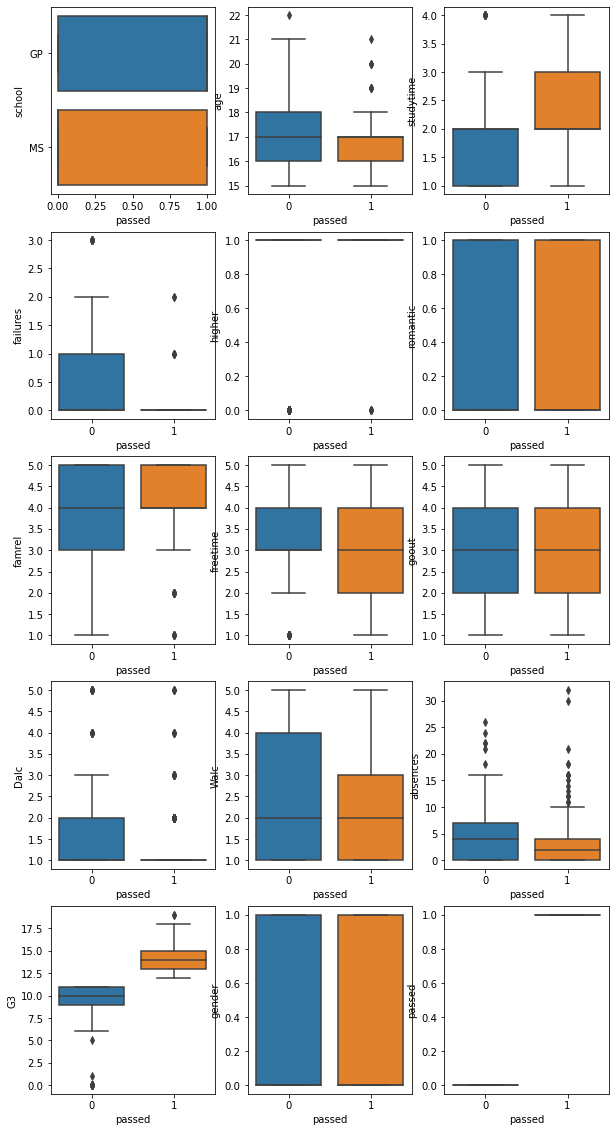

In [364]:
# Create a big figure with many subplots first

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)\
    ,(ax13,ax14,ax15)) = plt.subplots(5,3, figsize=(10,20))

# Plot all the box plots, since all the variables are continuous and we want to compare them to the target

for i in range(0,15):
    sns.boxplot(x=por['passed'], y=por.iloc[:,i], ax=globals()[f"ax{i+1}"])

In [365]:
features =["age", "studytime", "failures", "famrel", "freetime", "Dalc", "Walc", "absences"]
target = "passed"
NBClassifier = gnb()

In [366]:
NBClassifier

GaussianNB()

In [367]:
crossval_score= cross_val_score(NBClassifier, train[features], train[target], cv=5)

In [368]:
crossval_score.mean()

0.6872527472527473

In [369]:
crossval_score.var()

0.0005900736626011353

In [370]:
NBmodel = gnb().fit(train[features], train[target])

In [371]:
testx = test[features]
testy = test[target]

In [372]:
predicted_result = NBmodel.predict(testx[features])

In [373]:
accuracy_score(testy, predicted_result)

0.7025641025641025

<AxesSubplot:>

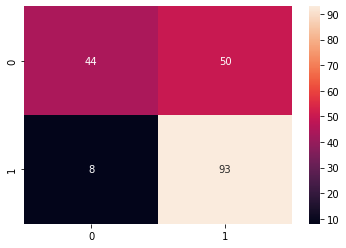

In [374]:
sns.heatmap(confusion_matrix(testy,predicted_result),annot=True)

In [375]:
#the model is pretty accurate at classifying the failed students in the test dataset, True Failed=44 compared to False Passed=8
#however, it is lacking at predicting the passed students, True Passed=93 compared to Falsed Failed=50
from sklearn.metrics import roc_curve

In [376]:
fpr, tpr, thresholds = roc_curve(testy, predicted_result)

Text(0, 0.5, 'TPR')

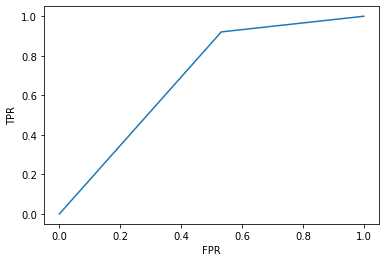

In [377]:
plt.plot(fpr, tpr, label=("Roc Curve"))
plt.xlabel("FPR")
plt.ylabel("TPR")
#the goal is to have really high TPR but low FPR, because if they are equally high the model is doing right and wrong at the same time

Text(0, 0.5, 'recall_NB')

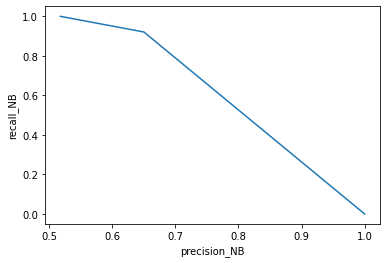

In [378]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(testy, predicted_result)
plt.plot(precision,recall)
plt.xlabel("precision_NB")
plt.ylabel("recall_NB")

In [379]:
#classifying using KNN
from sklearn.neighbors import KNeighborsClassifier

In [380]:
trainx = train[features]
trainy = train[target]
knn = KNeighborsClassifier(n_neighbors =5)

In [381]:
knn.fit(trainx, trainy)

KNeighborsClassifier()

In [382]:
pred_knn = knn.predict(testx)

In [384]:
accuracy_score(testy, pred_knn)

0.5743589743589743

<AxesSubplot:>

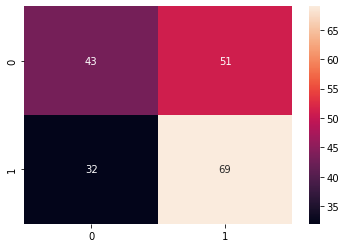

In [385]:
sns.heatmap(confusion_matrix(testy,pred_knn),annot=True)

Text(0, 0.5, 'recall_KNN')

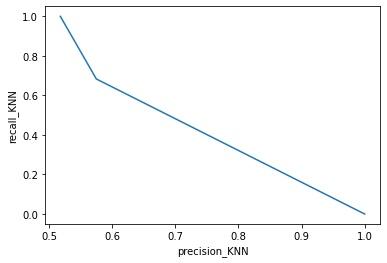

In [386]:
precision,recall,thresholds = precision_recall_curve(testy, pred_knn)
plt.plot(precision,recall)
plt.xlabel("precision_KNN")
plt.ylabel("recall_KNN")